In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

# Remove unnamed feature
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# remove Location and Subject Code
dataset.drop(['Location','Subject Code'], axis=1, inplace = True)


# Change object data type to numeric
objectFeatures = ['TP','air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']
for i in objectFeatures:
    dataset[i] = pd.to_numeric(dataset[i],errors = 'coerce')

#clean the NaN data
data = dataset.dropna()
data

,month,season,sex,TSV,TP,air_ts,air_tp,RH_ts,RH_tp,comfort,...,RH,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33
0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,4.0,...,49.1,0.768705,16.575062,26.948807,25.797614,24.948807,18.500000,19.238792,28.948807,27.979110
1,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,49.7,0.236143,6.148326,26.860770,25.521541,24.860770,18.500000,19.238792,28.860770,27.891073
2,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,49.7,0.246064,6.246280,26.948807,25.797614,24.948807,18.500000,19.238792,28.948807,27.979110
3,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,46.3,0.299259,6.838386,26.843366,25.786732,24.843366,18.500000,19.238792,28.843366,27.873669
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,46.5,-0.444504,9.015203,24.755364,25.510728,24.755364,18.500000,19.238792,24.755364,24.755364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,12.0,1.0,2.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,3.0,...,55.6,-2.470067,92.784269,12.665266,8.930533,10.665266,9.273256,8.107723,14.665266,13.695569
2604,12.0,1.0,2.0,0.0,-1.0,1.0,1.0,-1.0,0.0,3.0,...,55.5,-2.203402,85.036018,13.999499,14.198998,13.999499,9.273256,8.107723,13.999499,13.999499
2605,12.0,1.0,2.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,3.0,...,53.8,-1.529404,52.499530,15.498271,12.796541,13.498271,9.273256,8.107723,17.498271,16.528574
2606,12.0,1.0,2.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,3.0,...,55.2,-2.096908,80.941691,15.195137,12.190274,13.195137,9.273256,8.107723,17.195137,16.225440


In [12]:
data.TSV.replace({-3 : 0,
                  -2 : 1,
                  -1 : 2,
                   0 : 3,
                   1 : 4,
                   2 : 5,
                   3 : 6}, inplace=True)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3812\2028052787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TSV.replace({-3 : 0,


,month,season,sex,TSV,TP,air_ts,air_tp,RH_ts,RH_tp,comfort,...,RH,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33
0,1.0,1.0,1.0,2.0,-1.0,0.0,0.0,-1.0,-1.0,4.0,...,49.1,0.768705,16.575062,26.948807,25.797614,24.948807,18.500000,19.238792,28.948807,27.979110
1,1.0,1.0,1.0,2.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,49.7,0.236143,6.148326,26.860770,25.521541,24.860770,18.500000,19.238792,28.860770,27.891073
2,1.0,1.0,1.0,2.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,49.7,0.246064,6.246280,26.948807,25.797614,24.948807,18.500000,19.238792,28.948807,27.979110
3,1.0,1.0,1.0,2.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,46.3,0.299259,6.838386,26.843366,25.786732,24.843366,18.500000,19.238792,28.843366,27.873669
4,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,...,46.5,-0.444504,9.015203,24.755364,25.510728,24.755364,18.500000,19.238792,24.755364,24.755364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,12.0,1.0,2.0,2.0,-1.0,1.0,1.0,1.0,-1.0,3.0,...,55.6,-2.470067,92.784269,12.665266,8.930533,10.665266,9.273256,8.107723,14.665266,13.695569
2604,12.0,1.0,2.0,3.0,-1.0,1.0,1.0,-1.0,0.0,3.0,...,55.5,-2.203402,85.036018,13.999499,14.198998,13.999499,9.273256,8.107723,13.999499,13.999499
2605,12.0,1.0,2.0,2.0,0.0,-1.0,-1.0,-1.0,0.0,3.0,...,53.8,-1.529404,52.499530,15.498271,12.796541,13.498271,9.273256,8.107723,17.498271,16.528574
2606,12.0,1.0,2.0,2.0,-1.0,0.0,1.0,-1.0,0.0,3.0,...,55.2,-2.096908,80.941691,15.195137,12.190274,13.195137,9.273256,8.107723,17.195137,16.225440


<AxesSubplot:xlabel='TSV', ylabel='count'>

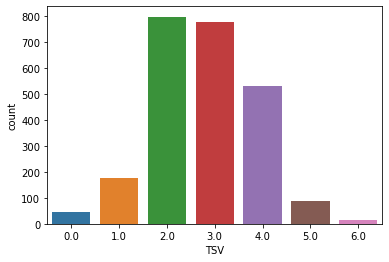

In [13]:
sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

In [6]:
# """
# Explore data on 3 section
# 1. Full Data --> all of parameter in dataset
# 2. Main Data --> only 6 parameter (ASHRAE-55)
# 3. Others Data --> exclude main parameter
# """
# all_feature = data.columns
# main_feature = ["Ti", "RH", "Tmr", "Va", "met", "clo"]
# target_label = ["TSV"]
# others_feature = [x for x in all_feature if x not in (main_feature + target_label)]


In [7]:
# full_data = data[main_feature + others_feature + target_label]
# main_data = data[main_feature + target_label]
# others_data = data[others_feature + target_label]

# Modeling

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.inspection import permutation_importance

from datetime import datetime as dt
import time

In [14]:
scaler = StandardScaler()

#Full data
y = data[['TSV']].values.ravel()
X = data.drop(['TSV'], axis=1)

features = X.columns
X = pd.DataFrame(scaler.fit_transform(X),columns = features)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1703, 29) (731, 29)
(1703,) (731,)


In [19]:
def peformance_report(X_train, y_train, X_test, y_test, model):
    
    # training model
    print("Training model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_pred)
    training_secs = (time.time() - start_time)
    
    print(f"  Training time : {training_secs} seconds")
    print(f"  Training accuracy : {trainAccuracy}\n")
    
    # testing model
    print("Testing model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testing_secs = (time.time() - start_time)
    
    print(f"  Testing time : {testing_secs} seconds")
    print(f"  Testing accuracy : {testAccuracy}\n")
    
    # error
    error_mse = mean_squared_error(y_test, y_pred)
    error_mae = mean_absolute_error(y_test, y_pred)
    error_mape= mean_absolute_percentage_error(y_test, y_pred)   
    
    print(f"  MSE   : {error_mse}")
    print(f"  MAE   : {error_mae}")
    print(f"  MAPE  : {error_mape}")
          
    # report
    testReport = classification_report(y_test, y_pred)
    print(f"\nReport :\n{testReport}")
    
    return clf, y_pred
    
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    # sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    # ax.set_xticklabels(labels=[-3,-2,-1,0,1,2,3])
    # ax.set_yticklabels(labels=[-3,-2,-1,0,1,2,3], rotation=0)
    ax.set_xticklabels(labels=["Cold", "Cool", "Slighty cool", "Neutral", "Slighty warm", "Warm", "Hot"], size=8, rotation=45)
    ax.set_yticklabels(labels=["Cold", "Cool", "Slighty cool", "Neutral", "Slighty warm", "Warm", "Hot"], size=8, rotation=0)

    
def importance(clf, features_name):
    fig, ax = plt.subplots(figsize=(16,12))
    # plot = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
    results = pd.DataFrame({'Features': features_name,
                            'Importances': clf.feature_importances_})
    results.sort_values(by='Importances', inplace=True)
    ax = plt.barh(results['Features'], results['Importances'])
    # plt.xlabel('Importance percentages')
    # ax.set_title('Feature Importance')
    # plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()
    return results
  

# XGBoost

In [20]:
from xgboost import XGBClassifier

In [21]:
model_xgb = XGBClassifier()

In [22]:
clf_xgb, y_pred = peformance_report(X_train, y_train, X_test, y_test, model_xgb)

Training model 
  Training time : 1.4260854721069336 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.3694837093353271 seconds
  Testing accuracy : 0.9699042407660738

  MSE   : 0.03419972640218878
  MAE   : 0.03146374829001368
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.88      0.91        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      0.99      0.99       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.79      0.85        33
         6.0       0.33      0.33      0.33         3

    accuracy                           0.97       731
   macro avg       0.87      0.83      0.85       731
weighted avg       0.97      0.97      0.97       731



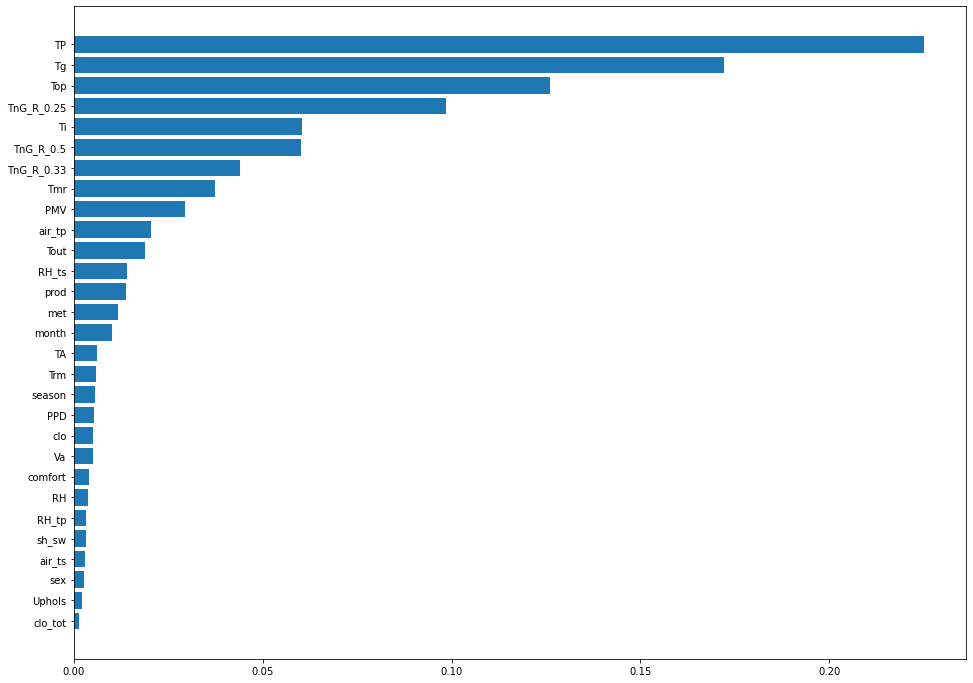

,Features,Importances
13,clo_tot,0.001432
12,Uphols,0.002113
2,sex,0.002808
4,air_ts,0.003127
15,sh_sw,0.003225
7,RH_tp,0.003228
19,RH,0.003706
8,comfort,0.004039
18,Va,0.005104
11,clo,0.005260


In [24]:
importance = importance(clf_xgb, features)
importance

# Find the most importance feature

In [26]:
importance_feature = importance.sort_values(by=['Importances'], ascending=False)
# importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['TP', 'Tg', 'Top', 'TnG_R_0.25', 'Ti', 'TnG_R_0.5', 'TnG_R_0.33', 'Tmr', 'PMV', 'air_tp', 'Tout', 'RH_ts', 'prod', 'met', 'month', 'TA', 'Trm', 'season', 'PPD', 'clo', 'Va', 'comfort', 'RH', 'RH_tp', 'sh_sw', 'air_ts', 'sex', 'Uphols', 'clo_tot']


29

In [48]:
y = data[['TSV']].values.ravel()
x = data[importance_features[0:1]]
    
X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:1])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
# print(y)
# print(x)

In [33]:
for i in range(len(importance_features) + 1):
    print(data[importance_features[0:i]].head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
    TP
0 -1.0
1 -1.0
2 -1.0
3 -1.0
4  0.0
    TP    Tg
0 -1.0  25.0
1 -1.0  24.9
2 -1.0  25.0
3 -1.0  24.9
4  0.0  24.8
    TP    Tg        Top
0 -1.0  25.0  24.948807
1 -1.0  24.9  24.860770
2 -1.0  25.0  24.948807
3 -1.0  24.9  24.843366
4  0.0  24.8  24.755364
    TP    Tg        Top  TnG_R_0.25
0 -1.0  25.0  24.948807   28.948807
1 -1.0  24.9  24.860770   28.860770
2 -1.0  25.0  24.948807   28.948807
3 -1.0  24.9  24.843366   28.843366
4  0.0  24.8  24.755364   24.755364
    TP    Tg        Top  TnG_R_0.25    Ti
0 -1.0  25.0  24.948807   28.948807  24.1
1 -1.0  24.9  24.860770   28.860770  24.2
2 -1.0  25.0  24.948807   28.948807  24.1
3 -1.0  24.9  24.843366   28.843366  23.9
4  0.0  24.8  24.755364   24.755364  24.0
    TP    Tg        Top  TnG_R_0.25    Ti  TnG_R_0.5
0 -1.0  25.0  24.948807   28.948807  24.1  26.948807
1 -1.0  24.9  24.860770   28.860770  24.2  26.860770
2 -1.0  25.0  24.948807   28.948807  24.1  26.948807
3 -1.

    TP    Tg        Top  TnG_R_0.25    Ti  TnG_R_0.5  TnG_R_0.33        Tmr  \
0 -1.0  25.0  24.948807   28.948807  24.1  26.948807   27.979110  25.797614   
1 -1.0  24.9  24.860770   28.860770  24.2  26.860770   27.891073  25.521541   
2 -1.0  25.0  24.948807   28.948807  24.1  26.948807   27.979110  25.797614   
3 -1.0  24.9  24.843366   28.843366  23.9  26.843366   27.873669  25.786732   
4  0.0  24.8  24.755364   24.755364  24.0  24.755364   24.755364  25.510728   

        PMV  air_tp  Tout  RH_ts  prod   met  month   TA        Trm  season  
0  0.768705     0.0  18.5   -1.0  -1.0  1.25    1.0  0.0  19.238792     1.0  
1  0.236143     0.0  18.5    1.0   0.0  1.00    1.0  0.0  19.238792     1.0  
2  0.246064     0.0  18.5    1.0   0.0  1.00    1.0  0.0  19.238792     1.0  
3  0.299259     0.0  18.5    1.0   0.0  1.00    1.0  0.0  19.238792     1.0  
4 -0.444504     0.0  18.5    0.0   0.0  1.10    1.0  0.0  19.238792     1.0  
    TP    Tg        Top  TnG_R_0.25    Ti  TnG_R_0.5  TnG

    TP    Tg        Top  TnG_R_0.25    Ti  TnG_R_0.5  TnG_R_0.33        Tmr  \
0 -1.0  25.0  24.948807   28.948807  24.1  26.948807   27.979110  25.797614   
1 -1.0  24.9  24.860770   28.860770  24.2  26.860770   27.891073  25.521541   
2 -1.0  25.0  24.948807   28.948807  24.1  26.948807   27.979110  25.797614   
3 -1.0  24.9  24.843366   28.843366  23.9  26.843366   27.873669  25.786732   
4  0.0  24.8  24.755364   24.755364  24.0  24.755364   24.755364  25.510728   

        PMV  air_tp  ...   clo   Va  comfort    RH  RH_tp  sh_sw  air_ts  sex  \
0  0.768705     0.0  ...  0.98  0.1      4.0  49.1   -1.0    0.0     0.0  1.0   
1  0.236143     0.0  ...  0.86  0.1      2.0  49.7    0.0   -1.0    -1.0  1.0   
2  0.246064     0.0  ...  0.85  0.1      2.0  49.7    0.0   -1.0    -1.0  1.0   
3  0.299259     0.0  ...  0.93  0.1      2.0  46.3    0.0   -1.0    -1.0  1.0   
4 -0.444504     0.0  ...  0.40  0.1      2.0  46.5    0.0    0.0     0.0  1.0   

   Uphols  clo_tot  
0   0.005    0.98

In [56]:
len_feature = []
trainAcc_xgb = []
testAcc_xgb = []
MSE_xgb = []
MAE_xgb = []
MAPE_xgb = []

model_xgb = XGBClassifier()

for i in range(len(importance_features) + 1):
    y = data[['TSV']].values.ravel()
    x = data[importance_features[0:i + 1]]
    
    X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:i+1])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_pred)
    trainAcc_xgb.append(trainAccuracy)
    
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testAcc_xgb.append(testAccuracy)
    
    MSE_xgb.append(mean_squared_error(y_test, y_pred))
    MAE_xgb.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb.append(mean_absolute_percentage_error(y_test, y_pred))
    
#     print(data[importance_features[0:i]].head())

In [57]:
len_feature

[]